In [1]:
import sys
import os, os.path

sys.path.append(os.path.join(os.getcwd() ,'/modules'))
root_path = "C:/git/Springboard-Public/Capstone Project 2/"
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/drive')
    root_path = "/content/drive/My Drive/Capstone Project 2/"

print('Current Working Dir: ', os.getcwd())
print('Root Path: ', root_path)

# We need to set the working directory since we are using relative paths from various locations
if os.getcwd() != root_path:
  os.chdir(root_path)

Current Working Dir:  C:\git\Springboard-Public\Capstone Project 2\notebooks
Root Path:  C:/git/Springboard-Public/Capstone Project 2/


In [2]:
from modules.lib.StandardTraining import *
from modules.models.ResNet import ResNet_GrayScale_12_Out

from torchsummary import summary

# os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

%matplotlib inline

In [3]:
force_cpu = True
device = torch.device('cuda' if ~force_cpu and torch.cuda.is_available() else 'cpu')
# Assume that we are on a CUDA machine, then this should print a CUDA device:
print(f'Working on device={device}')

Working on device=cuda


In [4]:
net = ResNet_GrayScale_12_Out(layers=18) #18, 34, 50, 101, 152

net = nn.DataParallel(net)
net.to(device)


summary(net, (1, 320, 320))   

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 160, 160]           3,136
       BatchNorm2d-2         [-1, 64, 160, 160]             128
              ReLU-3         [-1, 64, 160, 160]               0
         MaxPool2d-4           [-1, 64, 80, 80]               0
            Conv2d-5           [-1, 64, 80, 80]          36,864
       BatchNorm2d-6           [-1, 64, 80, 80]             128
              ReLU-7           [-1, 64, 80, 80]               0
            Conv2d-8           [-1, 64, 80, 80]          36,864
       BatchNorm2d-9           [-1, 64, 80, 80]             128
             ReLU-10           [-1, 64, 80, 80]               0
       BasicBlock-11           [-1, 64, 80, 80]               0
           Conv2d-12           [-1, 64, 80, 80]          36,864
      BatchNorm2d-13           [-1, 64, 80, 80]             128
             ReLU-14           [-1, 64,

In [5]:
standardTraining = StandardTraining(number_images=1500, 
                                     batch_size=1, 
                                     learning_rate=1e-3, 
                                     num_epochs=4,
                                     device=device, 
                                     net=net)

C:\git\Springboard-Public\Capstone Project 2\modules\lib\ChextXRayImages.py:251: UserWarning: 
Feature Imbalance Detected (train % - val %):
   Atelectasis: 4.42%
   Pneumothorax: 2.89%

  self.warnFeatureImbalance(train, value)


Number of Training Images: 1,231
Number of Validation Images: 269


In [6]:
standardTraining.train()

100%|██████████████████████████████████████████████████████████████████████████████| 1231/1231 [00:52<00:00, 23.30it/s]


Epoch [1/4]
Epoch Loss: 435.8985         
Training Time: 0:00:52.920532)          
Validation Time: 0:00:02.672855)

TRAINING



C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,140,0.007143,0.100000,0.013333,0.490988,0.114285
4,Edema,291,0.020619,0.272727,0.038339,0.490711,0.235068
5,Consolidation,58,0.000000,0.000000,0.000000,0.485742,0.046524
7,Atelectasis,210,0.009524,0.222222,0.018265,0.510149,0.176388
9,Pleural_Effusion,423,0.066194,0.388889,0.113131,0.527251,0.369708



VALIDATION



C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,37,0.0,0.0,0.0,0.505242,0.187278
4,Edema,62,0.0,0.0,0.0,0.483871,0.241355
5,Consolidation,14,0.0,0.0,0.0,0.551821,0.065698
7,Atelectasis,34,0.0,0.0,0.0,0.534668,0.134982
9,Pleural_Effusion,89,0.0,0.0,0.0,0.511985,0.323270


100%|██████████████████████████████████████████████████████████████████████████████| 1231/1231 [01:10<00:00, 17.34it/s]


Epoch [2/4]
Epoch Loss: 415.9561         
Training Time: 0:01:11.067024)          
Validation Time: 0:00:04.209747)

TRAINING



C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,140,0.00000,0.0,0.000000,0.482696,0.113930
4,Edema,291,0.00000,0.0,0.000000,0.497635,0.238277
5,Consolidation,58,0.00000,0.0,0.000000,0.498354,0.048111
7,Atelectasis,210,0.00000,0.0,0.000000,0.489944,0.189435
9,Pleural_Effusion,423,0.01182,0.5,0.023095,0.497095,0.346467



VALIDATION



C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,37,0.0,0.0,0.0,0.519688,0.167988
4,Edema,62,0.0,0.0,0.0,0.483248,0.237316
5,Consolidation,14,0.0,0.0,0.0,0.552381,0.074107
7,Atelectasis,34,0.0,0.0,0.0,0.519149,0.137178
9,Pleural_Effusion,89,0.0,0.0,0.0,0.520474,0.350769


100%|██████████████████████████████████████████████████████████████████████████████| 1231/1231 [01:22<00:00, 14.96it/s]


Epoch [3/4]
Epoch Loss: 412.8109         
Training Time: 0:01:22.380592)          
Validation Time: 0:00:02.803506)

TRAINING



C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,140,0.000000,0.000000,0.000000,0.443597,0.099244
4,Edema,291,0.000000,0.000000,0.000000,0.495120,0.244233
5,Consolidation,58,0.000000,0.000000,0.000000,0.401167,0.037269
7,Atelectasis,210,0.000000,0.000000,0.000000,0.490425,0.174186
9,Pleural_Effusion,423,0.002364,0.090909,0.004608,0.508687,0.341476



VALIDATION



C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,37,0.0,0.0,0.0,0.469245,0.162540
4,Edema,62,0.0,0.0,0.0,0.510519,0.261704
5,Consolidation,14,0.0,0.0,0.0,0.584594,0.075168
7,Atelectasis,34,0.0,0.0,0.0,0.534543,0.132057
9,Pleural_Effusion,89,0.0,0.0,0.0,0.488327,0.311387


100%|██████████████████████████████████████████████████████████████████████████████| 1231/1231 [00:52<00:00, 23.32it/s]


Epoch [4/4]
Epoch Loss: 413.2976         
Training Time: 0:00:52.892942)          
Validation Time: 0:00:02.740674)

TRAINING



C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,140,0.000000,0.00,0.000000,0.491384,0.114468
4,Edema,291,0.010309,0.50,0.020202,0.520297,0.256326
5,Consolidation,58,0.000000,0.00,0.000000,0.488373,0.048954
7,Atelectasis,210,0.000000,0.00,0.000000,0.484189,0.165443
9,Pleural_Effusion,423,0.016548,0.35,0.031603,0.487121,0.337106



VALIDATION



C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
1,Cardiomegaly,37,0.0,0.0,0.0,0.524231,0.189668
4,Edema,62,0.0,0.0,0.0,0.489715,0.251750
5,Consolidation,14,0.0,0.0,0.0,0.563866,0.070517
7,Atelectasis,34,0.0,0.0,0.0,0.534919,0.139360
9,Pleural_Effusion,89,0.0,0.0,0.0,0.501873,0.323805



TRAINING



,Score for all Targets
Accuracy Score,0.178716
Hamming Loss,0.136745
Combined Recall,0.058503
Combined Precision,0.106011
Combined F1,0.071162


C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,53,0.000000,0.000000,0.000000,0.544319,0.048711
1,Cardiomegaly,140,0.000000,0.000000,0.000000,0.491384,0.114468
2,Lung_Opacity,561,0.224599,0.510121,0.311881,0.519164,0.473776
3,Lung_Lesion,70,0.000000,0.000000,0.000000,0.505574,0.061718
4,Edema,291,0.010309,0.500000,0.020202,0.520297,0.256326
5,Consolidation,58,0.000000,0.000000,0.000000,0.488373,0.048954
6,Pneumonia,34,0.000000,0.000000,0.000000,0.546710,0.045767
7,Atelectasis,210,0.000000,0.000000,0.000000,0.484189,0.165443
8,Pneumothorax,118,0.000000,0.000000,0.000000,0.462721,0.086335
9,Pleural_Effusion,423,0.016548,0.350000,0.031603,0.487121,0.337106


***** ROC *****


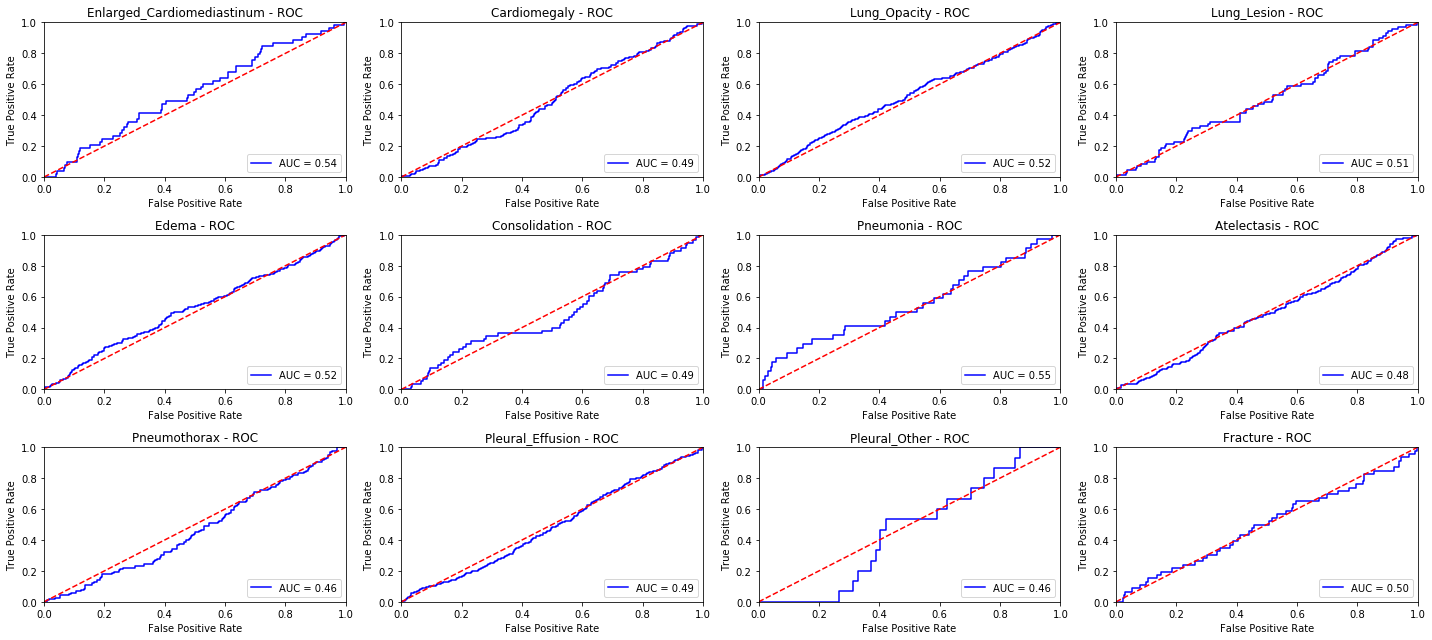

***** Precision / Recall *****


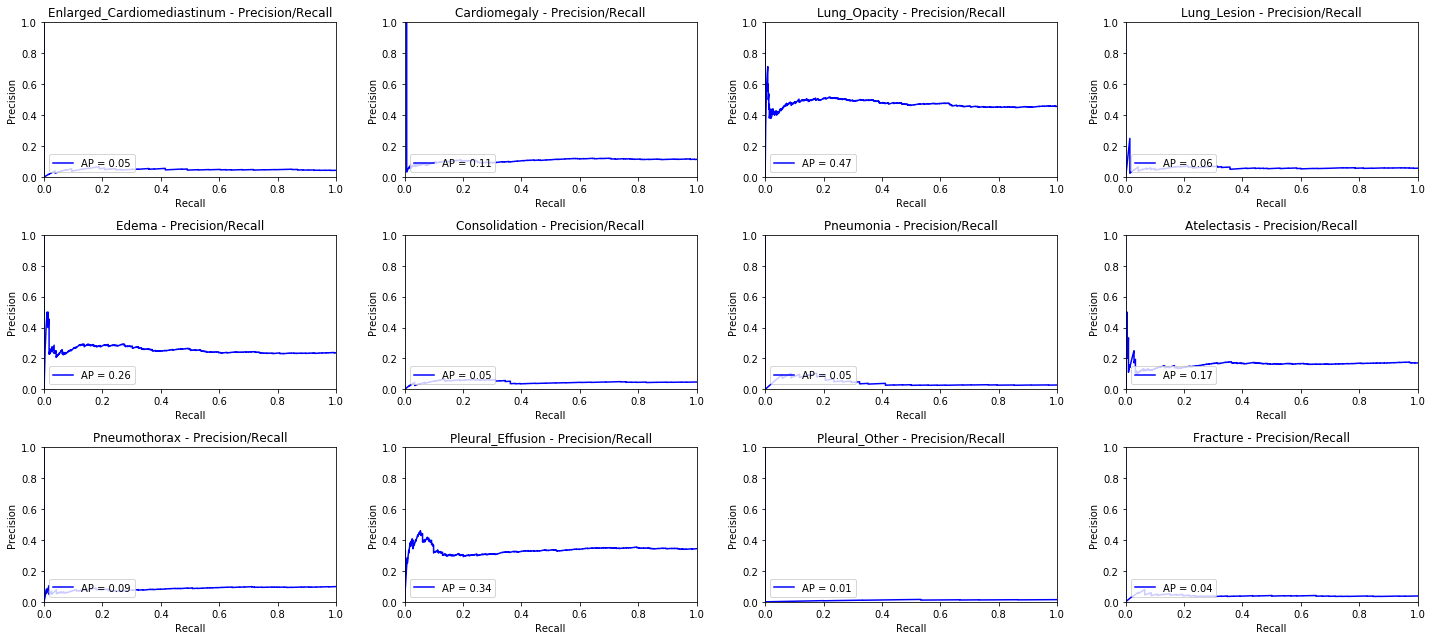


VALIDATION



,Score for all Targets
Accuracy Score,0.200743
Hamming Loss,0.135998
Combined Recall,0.027881
Combined Precision,0.044610
Combined F1,0.032838


C:\Users\youci\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Target,True Positive Count,Recall,Precision,F1,ROC AUC,Avg Precision
0,Enlarged_Cardiomediastinum,18,0.000000,0.000000,0.00,0.566180,0.083750
1,Cardiomegaly,37,0.000000,0.000000,0.00,0.524231,0.189668
2,Lung_Opacity,124,0.096774,0.333333,0.15,0.474750,0.436751
3,Lung_Lesion,13,0.000000,0.000000,0.00,0.620493,0.068047
4,Edema,62,0.000000,0.000000,0.00,0.489715,0.251750
5,Consolidation,14,0.000000,0.000000,0.00,0.563866,0.070517
6,Pneumonia,8,0.000000,0.000000,0.00,0.539272,0.038818
7,Atelectasis,34,0.000000,0.000000,0.00,0.534919,0.139360
8,Pneumothorax,18,0.000000,0.000000,0.00,0.528552,0.108961
9,Pleural_Effusion,89,0.000000,0.000000,0.00,0.501873,0.323805


***** ROC *****


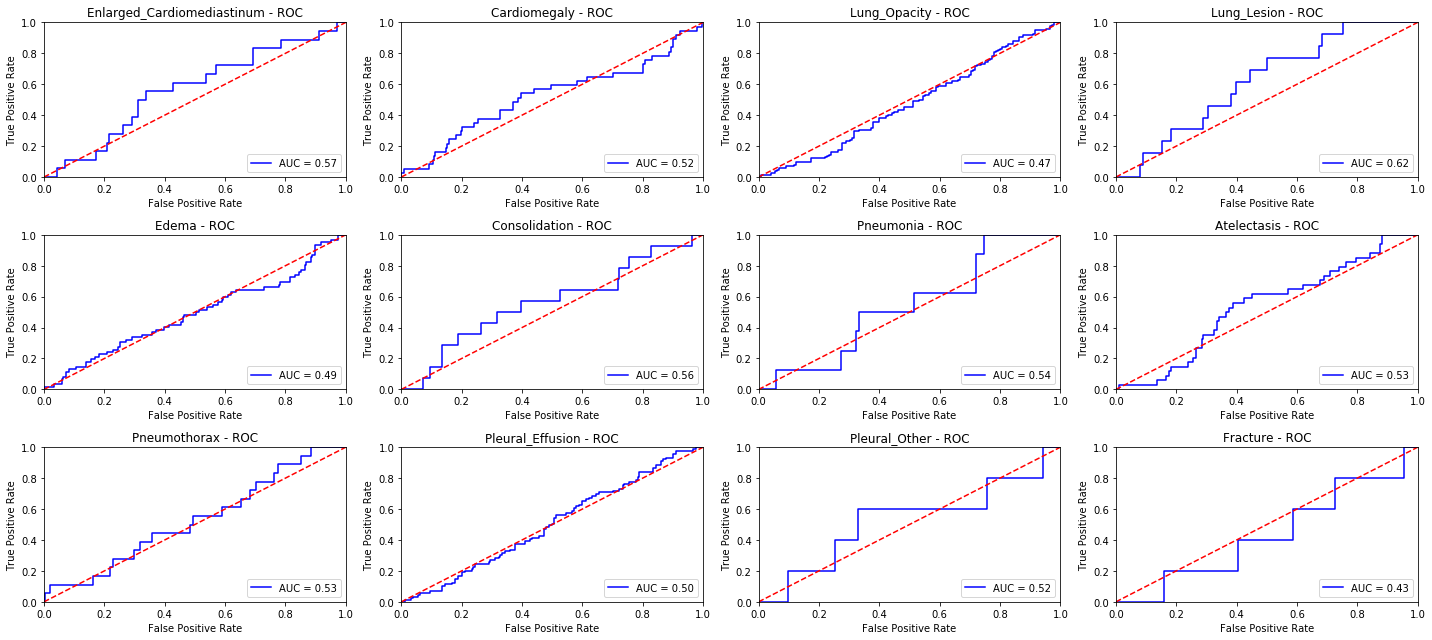

***** Precision / Recall *****


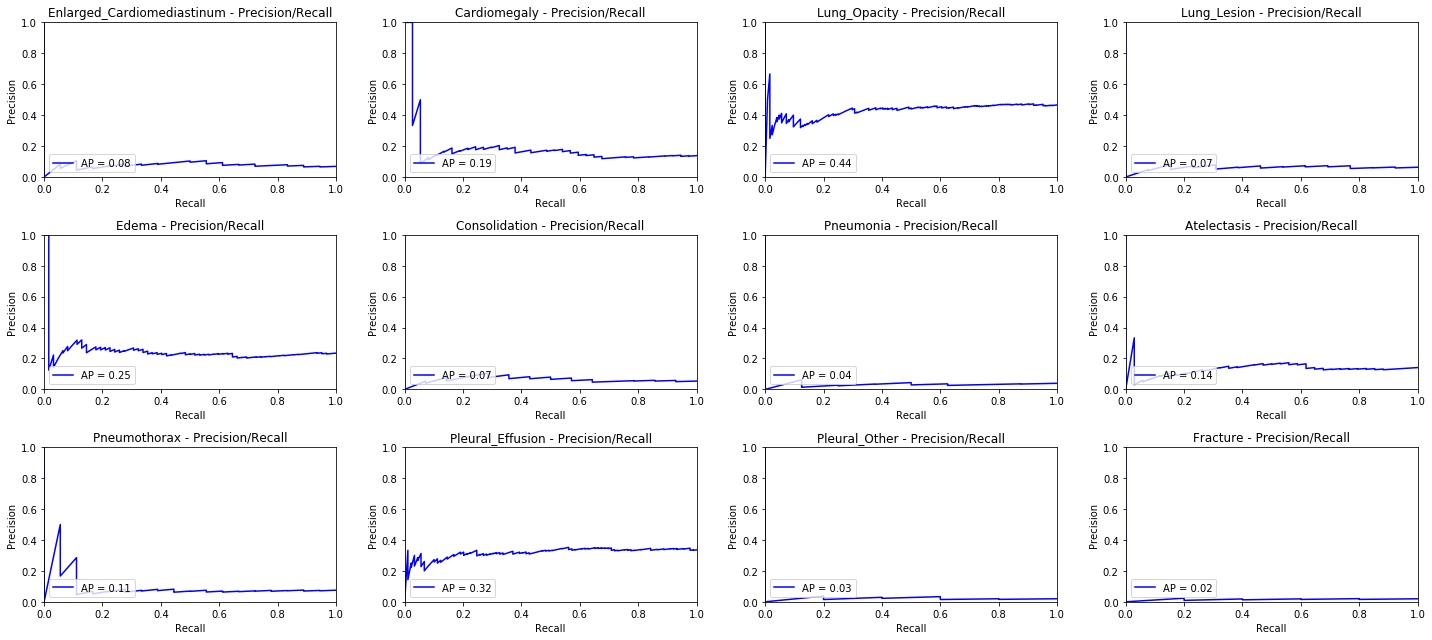

In [7]:
standardTraining.displayMetrics()